In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable

In [2]:
df = pd.read_csv("datos/historico_tickets_limpio_pandas.csv", index_col=0)

In [3]:
plt.rcParams["figure.figsize"] = (10,8)

# Pair Programming EDA III

### Hipóteis

- Tiempo de resolución: ¿Son los tickets con mayor severidad y prioridad los que se resuelven antes?

- Satisfacción del cliente: ¿Están los clientes con problemas de acceso y login más contentos que los que tienen problemas de software?

- Desempeño del agente: ¿Cuáles son los empleados que más tickets atienden? ¿Son los empleados que atienden más tickets los que tardan más en solucionar los problemas de los clientes? ¿Y la media de la satisfacción de los clientes es menor en aquellos empleados que atienden más solicitudes?

- Cambios en el tiempo: ¿Hay alguna diferencia a lo largo de los años y los meses en la cantidad de solitudes de tickets?

### Tareas

📌 Nota: incluid una pequeña explicación de lo que nos está mostrando la gráfica.

1. Estableced el tamaño de las figuras al inicio de vuestro jupyter para que todas tengan las mismas dimensiones.

2. Manos a la obra con los plots, estos irán muy dirigidos hacia las preguntas que queremos contestar, para hacer una primera aproximación a nuestras hipótesis:

- ¿Son los tickets con mayor severidad y prioridad los que se resuelven antes?

-Crear un subplot con dos gráficas.

-En la primera gráfica tendréis que mostrar la relación que existe entre la severidad y el tiempo de resolución. ¿Son los tickets que tienen una severidad más alta los que más tardan en resolverse?

-En la segunda gráfica tendréis que mostrar la relación que existe entre la prioridad y el tiempo de resolución. ¿Son los tickets que tienen una prioridad más alta los que más tardan en resolverse?

In [4]:
df.head()

,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,semestre,año,mes
0,GDDENR-5042564453,2016-07-13,1735,4,Acceso/Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0,5,2º semestre,2016,Julio
1,GDDENR-8042508060,2016-05-18,1566,10,Acceso/Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0,5,1 semestre,2016,Mayo
2,GDDESR-1342539995,2016-06-18,569,29,Sistema,Problema,0 - Sin Clasificar,0 - Sin Asignar,3,5,1 semestre,2016,Junio
3,GDDTSR-5942488006,2016-04-28,320,40,Sistema,Solicitud,0 - Sin Clasificar,0 - Sin Asignar,9,5,1 semestre,2016,Abril
4,GDLEER-0042524120,2016-06-03,1842,31,Software,Problema,2 - Normal,0 - Sin Asignar,0,5,1 semestre,2016,Junio


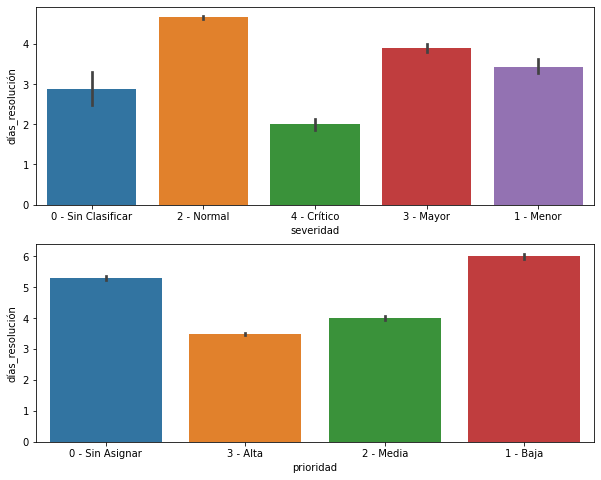

In [5]:
fig, axes= plt.subplots(2,1)

sns.barplot(x= 'severidad', y= 'días_resolución', data= df, ax= axes[0])
sns.barplot(x= 'prioridad', y= 'días_resolución', data= df, ax= axes[1])

plt.show();

- ¿Están los clientes con problemas de acceso y login más contentos que los que tienen problemas de software?

-Crear otro dataframe donde tengáis solo los datos para los datos para los problemas de tipo "Acceso/Login" o "Software".

-Crear una gráfica donde podamos ver la satisfacción de los clientes en función de los problemas filtrados en el paso anterior.

In [6]:
df_problemas = df[(df['categoría'] == "Acceso/Login") | (df['categoría'] == "Software")]
df_problemas.sample(5)

,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,semestre,año,mes
18587,SDRTER-4343997636,2020-06-15,883,6,Software,Solicitud,3 - Mayor,0 - Sin Asignar,0,1,1 semestre,2020,Junio
1541,GHLTER-6342497919,2016-05-07,701,29,Software,Solicitud,2 - Normal,3 - Alta,3,5,1 semestre,2016,Mayo
9115,SDLTER-4442871029,2017-05-16,1922,30,Software,Solicitud,2 - Normal,0 - Sin Asignar,4,5,1 semestre,2017,Mayo
9167,SDLTER-8242801680,2017-03-07,828,36,Software,Solicitud,2 - Normal,0 - Sin Asignar,2,1,1 semestre,2017,Marzo
10951,KMLTNR-6043580158,2019-04-25,1695,11,Acceso/Login,Solicitud,2 - Normal,2 - Media,0,3,1 semestre,2019,Abril


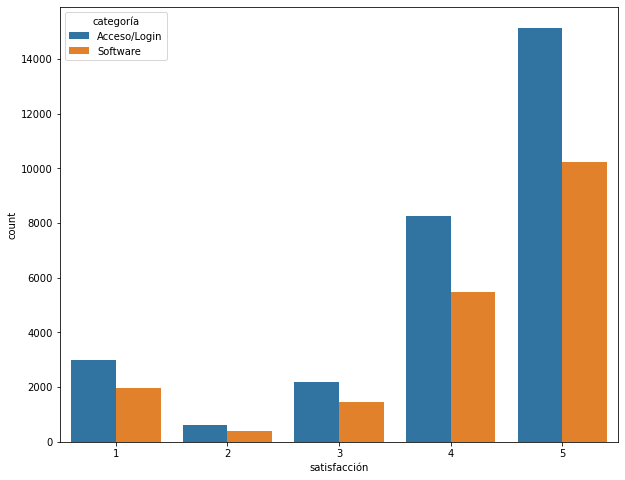

In [7]:
plt.figure()

sns.countplot(x= 'satisfacción', hue= 'categoría', data= df_problemas)

plt.show();

- ¿Cuáles son los empleados que más tickets atienden? ¿Son los empleados que atienden más tickets los que tardan más en solucionar los problemas de los clientes? ¿Y la media de la satisfacción de los clientes es menor en aquellos empleados que atienden más solicitudes?. Para contestar a esto haremos 3 gráficas independientes:

-En la primera gráfica deberemos, ¿Cuáles son los empleados que más tickets atienden?

-Sacar el número de tickets por empleado. Pista 💡 Para esto tendremos que usar un groupby.

-Visualizar el resultado del groupby anterior con la gráfica que sea más adecuada.

In [23]:
df_group_empleado = df.groupby('id_empleado').count().sort_values(by= 'id_ticket', ascending=False).reset_index()

In [25]:
df_group_empleado.head()

,id_empleado,id_ticket,fecha,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,semestre,año,mes
0,754,73,73,73,73,73,73,73,73,73,73,73,73
1,285,73,73,73,73,73,73,73,73,73,73,73,73
2,636,71,71,71,71,71,71,71,71,71,71,71,71
3,523,69,69,69,69,69,69,69,69,69,69,69,69
4,79,69,69,69,69,69,69,69,69,69,69,69,69


In [8]:
df_ticket_empleado = df.groupby('id_empleado').count().sort_values(by= 'id_ticket', ascending=False).iloc[:10,:].reset_index()
df_ticket_empleado

,id_empleado,id_ticket,fecha,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,semestre,año,mes
0,754,73,73,73,73,73,73,73,73,73,73,73,73
1,285,73,73,73,73,73,73,73,73,73,73,73,73
2,636,71,71,71,71,71,71,71,71,71,71,71,71
3,523,69,69,69,69,69,69,69,69,69,69,69,69
4,79,69,69,69,69,69,69,69,69,69,69,69,69
5,1341,69,69,69,69,69,69,69,69,69,69,69,69
6,442,68,68,68,68,68,68,68,68,68,68,68,68
7,326,68,68,68,68,68,68,68,68,68,68,68,68
8,482,68,68,68,68,68,68,68,68,68,68,68,68
9,1448,68,68,68,68,68,68,68,68,68,68,68,68


In [9]:
lista_mas = df_ticket_empleado['id_empleado'].to_list()
lista_mas

[754, 285, 636, 523, 79, 1341, 442, 326, 482, 1448]

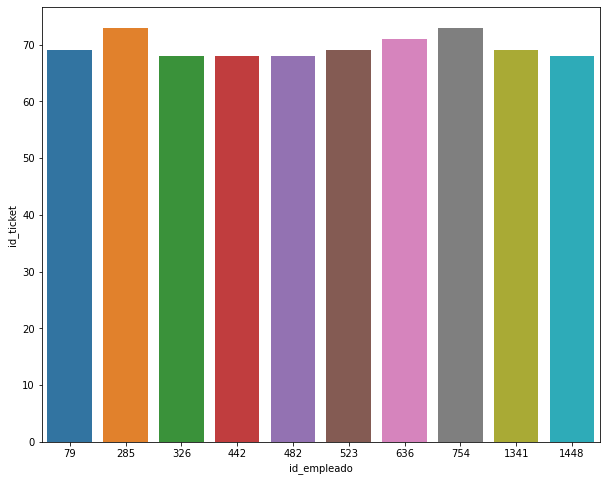

In [10]:
plt.figure()

sns.barplot(x= 'id_empleado', y= 'id_ticket', data= df_ticket_empleado)

plt.show();

In [11]:
df_empleado_menos = df.groupby('id_empleado').count().sort_values(by= 'id_ticket', ascending=True).iloc[:10,:].reset_index()
df_empleado_menos


,id_empleado,id_ticket,fecha,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,semestre,año,mes
0,793,26,26,26,26,26,26,26,26,26,26,26,26
1,99,27,27,27,27,27,27,27,27,27,27,27,27
2,1195,29,29,29,29,29,29,29,29,29,29,29,29
3,1618,31,31,31,31,31,31,31,31,31,31,31,31
4,72,31,31,31,31,31,31,31,31,31,31,31,31
5,686,32,32,32,32,32,32,32,32,32,32,32,32
6,607,32,32,32,32,32,32,32,32,32,32,32,32
7,1792,32,32,32,32,32,32,32,32,32,32,32,32
8,1384,32,32,32,32,32,32,32,32,32,32,32,32
9,1368,33,33,33,33,33,33,33,33,33,33,33,33


In [12]:
lista_menos = df_empleado_menos['id_empleado'].to_list()

In [13]:
lista_completa = lista_mas + lista_menos

In [24]:
df_group_empleados_10 = df_group_empleado[df_group_empleado['id_empleado'].isin(lista_completa)]
df_group_empleados_10

,id_empleado,id_ticket,fecha,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,semestre,año,mes
0,754,73,73,73,73,73,73,73,73,73,73,73,73
1,285,73,73,73,73,73,73,73,73,73,73,73,73
2,636,71,71,71,71,71,71,71,71,71,71,71,71
3,523,69,69,69,69,69,69,69,69,69,69,69,69
4,79,69,69,69,69,69,69,69,69,69,69,69,69
5,1341,69,69,69,69,69,69,69,69,69,69,69,69
6,442,68,68,68,68,68,68,68,68,68,68,68,68
7,326,68,68,68,68,68,68,68,68,68,68,68,68
8,482,68,68,68,68,68,68,68,68,68,68,68,68
9,1448,68,68,68,68,68,68,68,68,68,68,68,68


In [14]:
df_empleados = df[df['id_empleado'].isin(lista_completa)]
df_empleados

,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,semestre,año,mes
164,GDLESR-1142419559,2016-02-19,1195,15,Sistema,Problema,2 - Normal,0 - Sin Asignar,1,5,1 semestre,2016,Febrero
335,GDLTER-4842696065,2016-11-22,686,30,Software,Solicitud,2 - Normal,0 - Sin Asignar,8,5,2º semestre,2016,Noviembre
497,GDLTNR-0042596921,2016-08-14,1792,29,Acceso/Login,Solicitud,2 - Normal,0 - Sin Asignar,0,5,2º semestre,2016,Agosto
598,GDLTNR-5142539863,2016-06-18,636,18,Acceso/Login,Solicitud,2 - Normal,0 - Sin Asignar,1,5,1 semestre,2016,Junio
612,GDLTNR-6042526866,2016-06-05,686,8,Acceso/Login,Solicitud,2 - Normal,0 - Sin Asignar,0,5,1 semestre,2016,Junio
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28771,TWLTSR-1643891669,2020-03-01,686,26,Sistema,Solicitud,2 - Normal,1 - Baja,12,5,1 semestre,2020,Marzo
28859,TWLTSR-4843970321,2020-05-19,482,43,Sistema,Solicitud,2 - Normal,1 - Baja,8,4,1 semestre,2020,Mayo
28958,TWLTSR-8243952987,2020-05-01,1448,9,Sistema,Solicitud,2 - Normal,1 - Baja,9,1,1 semestre,2020,Mayo
28980,TWLTSR-8843892525,2020-03-02,72,45,Sistema,Solicitud,2 - Normal,1 - Baja,8,5,1 semestre,2020,Marzo


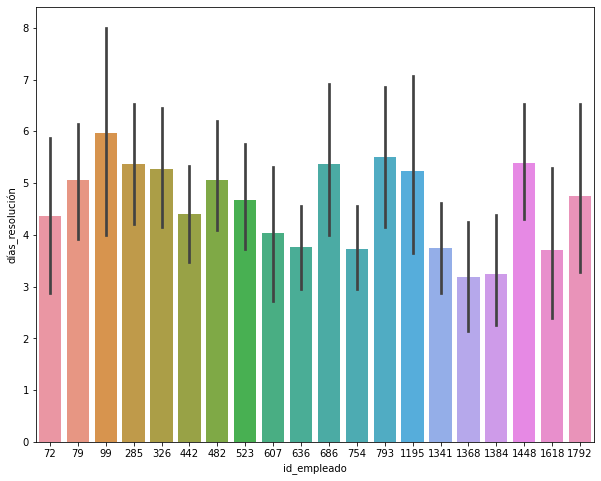

In [15]:
plt.figure()

sns.barplot(x= 'id_empleado', y= 'días_resolución', data= df_empleados)

plt.show();

- ¿Y la media de la satisfacción de los clientes es menor en aquellos empleados que atienden más solicitudes?

📌 Usaremos los mismos datos que en la pregunta anterior, el dataframe de los 10 empleados más productivos y menos productivos.

-Cread una gráfica donde veamos la satisfacción de los clientes para cada empleado.

In [16]:
df_empleados['mas_menos'] = np.where(df_empleados['id_empleado'].isin(lista_menos), 'diez_menos', 'diez_mas')

/tmp/ipykernel_3248/3232931995.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_empleados['mas_menos'] = np.where(df_empleados['id_empleado'].isin(lista_menos), 'diez_menos', 'diez_mas')


In [17]:
df_empleados['id_empleado'] = df_empleados['id_empleado'].astype('object', errors='ignore')

/tmp/ipykernel_3248/3107499400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_empleados['id_empleado'] = df_empleados['id_empleado'].astype('object', errors='ignore')


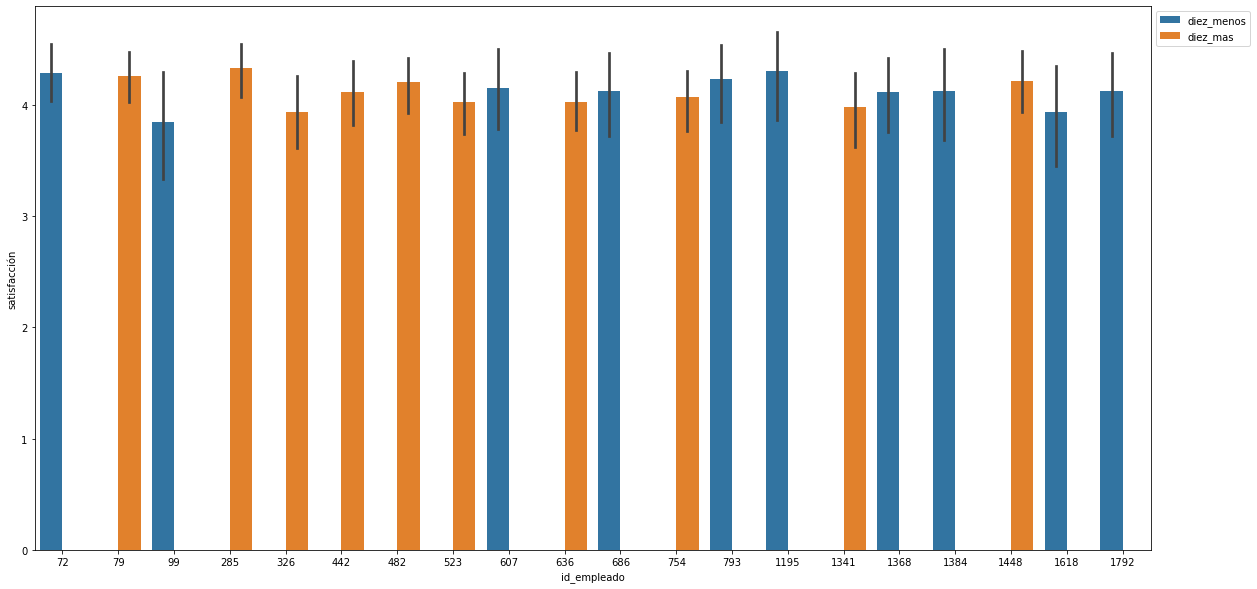

In [28]:
plt.figure(figsize=(20,10))

sns.barplot(x= 'id_empleado', y= 'satisfacción', data= df_empleados, hue='mas_menos')

plt.legend(bbox_to_anchor = (1,1))

plt.show();

*